### Hashing Feature Transformation Using Totally Random Trees 

RandomTreesEmbedding provides a way to map data to a very high-dimensional, sparse representation, which might be beneficial for classification. The mapping is completely unsupervised and very efficient. This example visualizes the partitions given by several trees and shows how the transformation can also be used for non-linear dimensionality reduction or non-linear classification.

Points that are neighboring often share the same leaf of a tree and therefore share large parts of their hashed representation. This allows to separate two concentric circles simply based on the principal components of the transformed data with truncated SVD. In high-dimensional spaces, linear classifiers often achieve excellent accuracy. For sparse binary data, BernoulliNB is particularly well-suited. The bottom row compares the decision boundary obtained by BernoulliNB in the transformed space with an ExtraTreesClassifier forests learned on the original data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

<b>Creating a synthetic dataset:</b>

In [6]:
x, y = make_circles(factor = 0.5, random_state = 0, noise = 0.05)

<b>Transform data:</b>

In [8]:
hasher = RandomTreesEmbedding(n_estimators = 10, random_state = 0, max_depth = 3)
x_transformed = hasher.fit_transform(x)

<b>Visualize result after dimensionality reduction using truncated SVD:</b>

In [12]:
svd = TruncatedSVD(n_components = 2)
x_reduced = svd.fit_transform(x_transformed)

<b>Learn NB Classifier on transformed data:</b>

In [14]:
nb = BernoulliNB()
nb.fit(x_transformed, y)

BernoulliNB()

<b>Learn an ExtraTreesClassifier for comparison:</b>

In [15]:
trees = ExtraTreesClassifier(max_depth = 3, n_estimators = 10, random_state = 0)
trees.fit(x, y)

ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)

<b>Scatter plot of original and reduced data:</b>

[]

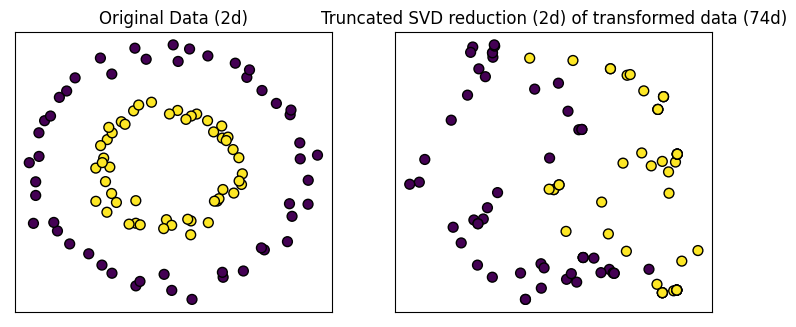

In [20]:
fig = plt.figure(figsize = (9, 8))
ax = plt.subplot(221)
ax.scatter(x[:, 0], x[:, 1], c=y, s=50, edgecolor="k")
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y, s=50, edgecolor="k")
ax.set_title(
    "Truncated SVD reduction (2d) of transformed data (%dd)" % x_transformed.shape[1]
)
ax.set_xticks(())
ax.set_yticks(())

<b>Plot decision in original space. Assign a color to each point in the mesh [x_min, x_max] x [y_min, y_max]:</b>

In [22]:
h = 0.01
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<b>Transform grid using RandomTreesEmbedding:</b>

In [24]:
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

[]

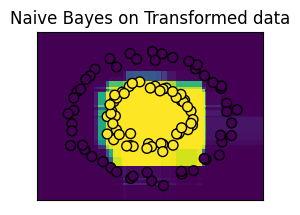

In [26]:
ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(x[:, 0], x[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

<b>Transform grid using ExtraTreesClassifier:</b>

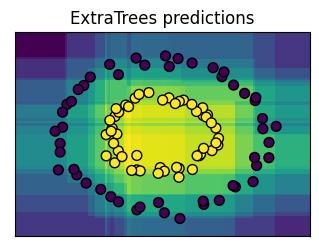

In [29]:
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(x[:, 0], x[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()

<b><i>The End.</i></b>